## PREDICCION DE RETRASOS DE VUELOS POR CONDICIONES CLIMATICAS ##

Introduccion:

OBJETIVO:

Se busca reducir los retrasos y cancelaciones de los vuelos en distintas aerolineas de un determinado pais. 

CONTEXTO EMPRESARIAL:

Periodicamente salen y llegan vuelos a distintos aeropuertos, pero muchos de ellos encuentran diferentes situaciones que provocan un retraso en lo planificado y perjudicando asi a los clientes y retrasando tambien otros vuelos. 

PROBLEMA COMERCIAL:

Muchas veces el clima, la seguridad, las inspecciones de las aeronaves provocan retrasos o incluso cancelaciones en los vuelos programados, costandole a la aerolinea muchisimo dinero, perdida de clientes, etc. 

Acudieron a nosotros, los socios del aeropuerto ubicado en cierta ciudad, expresando sus problematicas y buscando soluciones, por los que se propuso crear un algoritmo capas de predecir estos retrasos o cancelaciones por medio de un entrenamiento a base de los registros en sus bases de datos. 

CONTEXTO ANALITICO:

Se nos ha facilitado una registro que contiene una gran cantidad de datos de vuelos, aeronaves, clientes, condiciones climaticas en esa ubicacion y en determinados momentos, cantidad de vuelos por aerolinea y el registro que mas nos importa... si fue retrasado o no. 

Este archivo es de tipo (csv) separado por comas y contiene mas de 400.000 registros y 30 columnas. 


EDA:

Se describen las tareas a realizar en esta parte del proyecto.

1- Extraer el archivo y verificar su lectura

2- Leer y crear visualizaciones para saber como esta compuesto dicho archivo

3- Realizar un analisis exploratorio de los datos, buscar patrones que nos puedan proveer mas informacion y proyectarlos como visualizaciones.

El cliente tiene un conjunto de preguntas, las cuales es fundamental encontrar una respuesta.

¿Hay relacion entre los meses y la cantidad de vuelos cancelados?

¿Tienen que ver las epocas de turismo?

¿Hay aerolineas que tienen mas vuelos cancelados que otras?

¿Hay relacion entre el clima y las demoras?


### Descripcion de las variables

* MONTH:				Month 
* DAY_OF_WEEK:			Day of Week 
* DEP_DEL15: 			TARGET Binary of a departure delay over 15 
minutes (1 is yes)
* DISTANCE_GROUP:			Distance group to be flown by departing aircraft
* DEP_BLOCK:			Departure block
* SEGMENT_NUMBER:			The segment that this tail number is on for the day
* CONCURRENT_FLIGHTS:		Concurrent flights leaving from the airport in the same departure block
* NUMBER_OF_SEATS:		Number of seats on the aircraft
* CARRIER_NAME:			Carrier
* AIRPORT_FLIGHTS_MONTH:		Avg Airport Flights per Month
* AIRLINE_FLIGHTS_MONTH:		Avg Airline Flights per Month
* AIRLINE_AIRPORT_FLIGHTS_MONTH:	Avg Flights per month for Airline AND Airport
* AVG_MONTHLY_PASS_AIRPORT:	Avg Passengers for the departing airport for the month
* AVG_MONTHLY_PASS_AIRLINE:	Avg Passengers for airline for month
* FLT_ATTENDANTS_PER_PASS:	Flight attendants per passenger for airline
* GROUND_SERV_PER_PASS:		Ground service employees (service desk) per passenger for airline
* PLANE_AGE:			Age of departing aircraft
* DEPARTING_AIRPORT:		Departing Airport
* LATITUDE:			Latitude of departing airport
* LONGITUDE:			Longitude of departing airport
* PREVIOUS_AIRPORT:		Previous airport that aircraft departed from
* PRCP:				Inches of precipitation for day
* SNOW:				Inches of snowfall for day
* SNWD:				Inches of snow on ground for day
* TMAX:				Max temperature for day
* AWND:				Max wind speed for day

In [1]:
# Importamos las librerias necesarias. 
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# Leemos el dataset ubicado en una carpeta en google drive. 
flights = pd.read_csv('/content/drive/MyDrive/Natanael Cobos - DataScience/Cobos Natanael - Segunda pre entrega/train.csv')


#1. EDA #

Estudio de la variable target: DEP_DEL15

Esta variable fue transformada de tal manera que los vuelos que sufrieron un retraso de mas de 15 min sean 1 y los que no sean 0. 

In [5]:
flights.head()

,MONTH,DAY_OF_WEEK,DEP_DEL15,DEP_TIME_BLK,DISTANCE_GROUP,SEGMENT_NUMBER,CONCURRENT_FLIGHTS,NUMBER_OF_SEATS,CARRIER_NAME,AIRPORT_FLIGHTS_MONTH,...,PREVIOUS_AIRPORT,PRCP,SNOW,SNWD,TMAX,AWND,CARRIER_HISTORICAL,DEP_AIRPORT_HIST,DAY_HISTORICAL,DEP_BLOCK_HIST
0,7,7,0,1500-1559,3,3,26,160,American Airlines Inc.,19534,...,Chicago O'Hare International,0.00,0.0,0.0,95.0,4.25,0.237709,0.273236,0.222538,0.255479
1,4,1,0,1300-1359,4,4,63,50,SkyWest Airlines Inc.,18788,...,El Paso International,0.00,0.0,0.0,71.0,11.41,0.154651,0.121849,0.237972,0.197503
2,11,4,0,0001-0559,2,1,3,76,American Eagle Airlines Inc.,1148,...,NONE,0.00,0.0,0.0,54.0,0.45,0.117559,0.187867,0.139886,0.060327
3,3,2,0,1500-1559,7,5,14,143,Southwest Airlines Co.,7612,...,San Jose International,0.00,0.0,0.0,64.0,8.05,0.204389,0.141446,0.132868,0.202037
4,7,3,0,0800-0859,1,2,85,50,American Eagle Airlines Inc.,29376,...,Cincinnati/Northern Kentucky International,0.01,0.0,0.0,94.0,10.51,0.203263,0.193761,0.203027,0.113050


In [6]:
flights.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4542343 entries, 0 to 4542342
Data columns (total 30 columns):
 #   Column                         Dtype  
---  ------                         -----  
 0   MONTH                          int64  
 1   DAY_OF_WEEK                    int64  
 2   DEP_DEL15                      int64  
 3   DEP_TIME_BLK                   object 
 4   DISTANCE_GROUP                 int64  
 5   SEGMENT_NUMBER                 int64  
 6   CONCURRENT_FLIGHTS             int64  
 7   NUMBER_OF_SEATS                int64  
 8   CARRIER_NAME                   object 
 9   AIRPORT_FLIGHTS_MONTH          int64  
 10  AIRLINE_FLIGHTS_MONTH          int64  
 11  AIRLINE_AIRPORT_FLIGHTS_MONTH  int64  
 12  AVG_MONTHLY_PASS_AIRPORT       int64  
 13  AVG_MONTHLY_PASS_AIRLINE       int64  
 14  FLT_ATTENDANTS_PER_PASS        float64
 15  GROUND_SERV_PER_PASS           float64
 16  PLANE_AGE                      int64  
 17  DEPARTING_AIRPORT              object 
 18  LA

Se Observan datos de tipo enteros y objetos. 

In [7]:
flights.memory_usage().sum()

1090162448

* Como podemos ver, el dataset contiene muchos valores, por lo que se define utilizar solo 1 segmento para el analisis y posterior entrenamiento. 
Esto se realiza con el fin de agilizar el analisis y los modelos de prediccion... una vez limpio el dataset se restituiran todas las filas para crear el modelo final.
* Previo a este paso, se verifico que no haya nulos en nuestro dataset, ya que de contener nulos, estariamos obviando informacion.  

In [8]:
flights_seg=flights[0:200000]

In [9]:
flights_seg.memory_usage().sum()

48000128

* Se logro reducir el tamaño del dataset y comenzaremos con el analisis estadistico del mismo

In [10]:
flights_seg.isnull().sum()

MONTH                            0
DAY_OF_WEEK                      0
DEP_DEL15                        0
DEP_TIME_BLK                     0
DISTANCE_GROUP                   0
SEGMENT_NUMBER                   0
CONCURRENT_FLIGHTS               0
NUMBER_OF_SEATS                  0
CARRIER_NAME                     0
AIRPORT_FLIGHTS_MONTH            0
AIRLINE_FLIGHTS_MONTH            0
AIRLINE_AIRPORT_FLIGHTS_MONTH    0
AVG_MONTHLY_PASS_AIRPORT         0
AVG_MONTHLY_PASS_AIRLINE         0
FLT_ATTENDANTS_PER_PASS          0
GROUND_SERV_PER_PASS             0
PLANE_AGE                        0
DEPARTING_AIRPORT                0
LATITUDE                         0
LONGITUDE                        0
PREVIOUS_AIRPORT                 0
PRCP                             0
SNOW                             0
SNWD                             0
TMAX                             0
AWND                             0
CARRIER_HISTORICAL               0
DEP_AIRPORT_HIST                 0
DAY_HISTORICAL      

In [11]:
flights_seg.columns

Index(['MONTH', 'DAY_OF_WEEK', 'DEP_DEL15', 'DEP_TIME_BLK', 'DISTANCE_GROUP',
       'SEGMENT_NUMBER', 'CONCURRENT_FLIGHTS', 'NUMBER_OF_SEATS',
       'CARRIER_NAME', 'AIRPORT_FLIGHTS_MONTH', 'AIRLINE_FLIGHTS_MONTH',
       'AIRLINE_AIRPORT_FLIGHTS_MONTH', 'AVG_MONTHLY_PASS_AIRPORT',
       'AVG_MONTHLY_PASS_AIRLINE', 'FLT_ATTENDANTS_PER_PASS',
       'GROUND_SERV_PER_PASS', 'PLANE_AGE', 'DEPARTING_AIRPORT', 'LATITUDE',
       'LONGITUDE', 'PREVIOUS_AIRPORT', 'PRCP', 'SNOW', 'SNWD', 'TMAX', 'AWND',
       'CARRIER_HISTORICAL', 'DEP_AIRPORT_HIST', 'DAY_HISTORICAL',
       'DEP_BLOCK_HIST'],
      dtype='object')

# 1.2: ANALISIS ESTADISICO DE VARIABLES #

In [12]:
flights_seg.describe(include = 'all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
MONTH,200000.0,NaN,NaN,NaN,6.610015,3.389564,1.0,4.0,7.0,10.0,12.0
DAY_OF_WEEK,200000.0,NaN,NaN,NaN,3.93363,1.995148,1.0,2.0,4.0,6.0,7.0
DEP_DEL15,200000.0,NaN,NaN,NaN,0.188475,0.391092,0.0,0.0,0.0,0.0,1.0
DEP_TIME_BLK,200000,19,0800-0859,13799,NaN,NaN,NaN,NaN,NaN,NaN,NaN
DISTANCE_GROUP,200000.0,NaN,NaN,NaN,3.825315,2.387496,1.0,2.0,3.0,5.0,11.0
SEGMENT_NUMBER,200000.0,NaN,NaN,NaN,3.046835,1.763927,1.0,2.0,3.0,4.0,15.0
CONCURRENT_FLIGHTS,200000.0,NaN,NaN,NaN,27.809655,21.550662,1.0,11.0,23.0,39.0,109.0
NUMBER_OF_SEATS,200000.0,NaN,NaN,NaN,133.81914,46.424062,44.0,90.0,143.0,172.0,337.0
CARRIER_NAME,200000,17,Southwest Airlines Co.,39686,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AIRPORT_FLIGHTS_MONTH,200000.0,NaN,NaN,NaN,12675.82587,8848.260078,1100.0,5313.0,11562.0,17615.0,35256.0


--------------------------------------
Hay 17 Aerolineas en total 

El maximo de vuelos que tuvo un aeropuerto fue de 35.256

---------
1.3 Analisis univariado 
---------

In [17]:
from pandas.api.types import is_numeric_dtype
import numpy as np 

def univariado_info(flights_seg):
  '''Calculo de informacion estadisticas y genericas de cada columna de un dataframe '''

  #creacion de dataframe con columnas especificas

  df_info = pd.DataFrame(columns=['Cantidad', 'Tipo', 'Missing', 'Unicos', 'Numeric'])
  # Loop de todas las variables del dataframe
  for col in flights_seg:
    #obtengo info de la columna
    data_series = flights_seg[col]
    #Lleno el dataframe con las columnas iniciales
    df_info.loc[col] = [data_series.count(), data_series.dtype, data_series.isnull().sum(), data_series.nunique(), is_numeric_dtype(data_series)]

  # Calculo el describe
  df_describe = flights_seg.describe(include = 'all').T[['top', 'mean', 'std','min','25%', '50%', '75%', 'max']]
  #Calculo sesgo y curtosis
  df_stats = pd.DataFrame([flights_seg.skew(), flights_seg.kurtosis()], index=['sesgo', 'kurt']).T

  return pd.concat([df_info, pd.concat([df_describe, df_stats], axis = 1)], axis = 1).fillna('-')

In [52]:
df_uni_stats = univariado_info(flights_seg)
df_uni_stats

<ipython-input-17-a569c1d95096>:20: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_stats = pd.DataFrame([flights_seg.skew(), flights_seg.kurtosis()], index=['sesgo', 'kurt']).T


,Cantidad,Tipo,Missing,Unicos,Numeric,top,mean,std,min,25%,50%,75%,max,sesgo,kurt
MONTH,200000,int64,0,12,True,-,6.610015,3.389564,1.0,4.0,7.0,10.0,12.0,-0.032809,-1.165534
DAY_OF_WEEK,200000,int64,0,7,True,-,3.93363,1.995148,1.0,2.0,4.0,6.0,7.0,0.051516,-1.221637
DEP_DEL15,200000,int64,0,2,True,-,0.188475,0.391092,0.0,0.0,0.0,0.0,1.0,1.593119,0.538035
DEP_TIME_BLK,200000,object,0,19,False,0800-0859,-,-,-,-,-,-,-,-,-
DISTANCE_GROUP,200000,int64,0,11,True,-,3.825315,2.387496,1.0,2.0,3.0,5.0,11.0,1.227805,1.092728
SEGMENT_NUMBER,200000,int64,0,15,True,-,3.046835,1.763927,1.0,2.0,3.0,4.0,15.0,0.833473,0.537792
CONCURRENT_FLIGHTS,200000,int64,0,107,True,-,27.809655,21.550662,1.0,11.0,23.0,39.0,109.0,1.024357,0.31461
NUMBER_OF_SEATS,200000,int64,0,80,True,-,133.81914,46.424062,44.0,90.0,143.0,172.0,337.0,-0.128491,-0.246436
CARRIER_NAME,200000,object,0,17,False,Southwest Airlines Co.,-,-,-,-,-,-,-,-,-
AIRPORT_FLIGHTS_MONTH,200000,int64,0,969,True,-,12675.82587,8848.260078,1100.0,5313.0,11562.0,17615.0,35256.0,0.791734,-0.169172


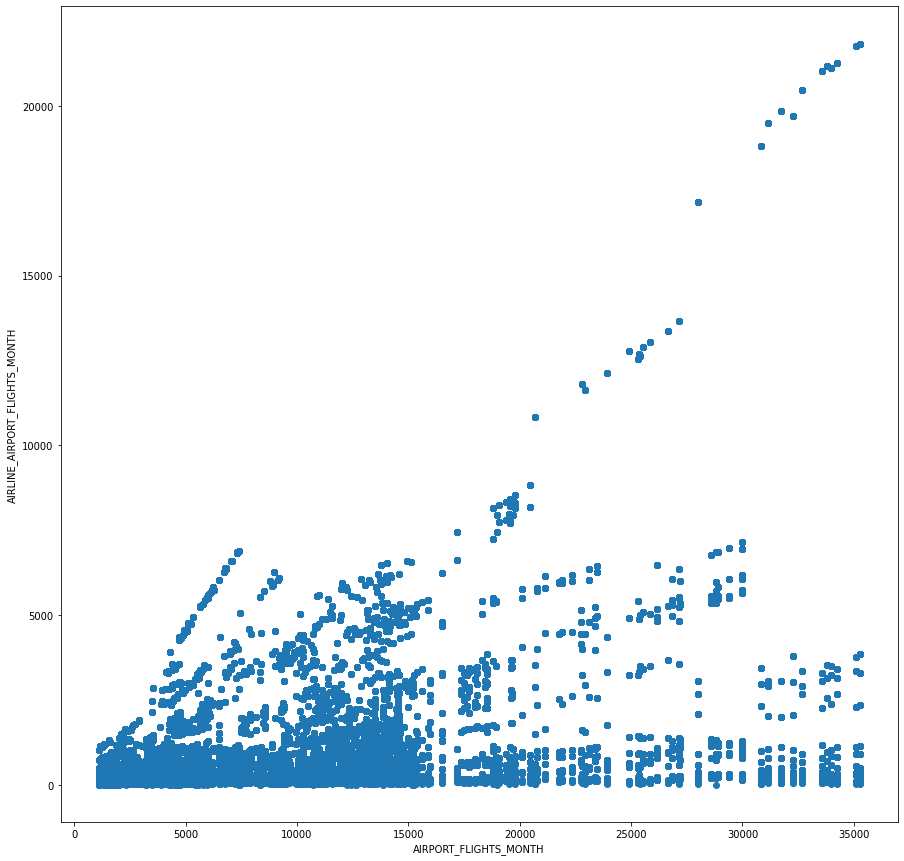

In [ ]:
fig, ax = plt.subplots(1,1, figsize=(15, 15))
ax.scatter(data=flights_seg, x= 'AIRPORT_FLIGHTS_MONTH', y='AIRLINE_AIRPORT_FLIGHTS_MONTH', alpha= 1)
ax.set_xlabel('AIRPORT_FLIGHTS_MONTH')
ax.set_ylabel('AIRLINE_AIRPORT_FLIGHTS_MONTH');

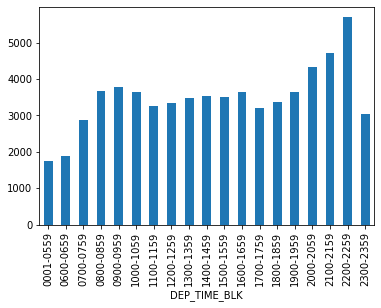

In [20]:
flights_seg.groupby('DEP_TIME_BLK').mean()['AIRLINE_AIRPORT_FLIGHTS_MONTH'].plot(kind='bar')

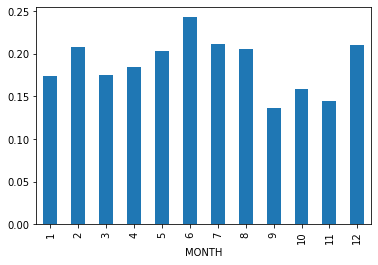

In [21]:
flights_seg.groupby('MONTH').mean()['DEP_DEL15'].plot(kind='bar')

* Se grafican las variables consideradas relevantes. 
* Se desestima la variable "DEP_TIME_BKL" debido a que esta variable indica los tiempos estimados de partida pero no los reales, por lo que no es un dato necesario para analisis o entrenamiento. 

In [19]:
month = flights_seg.groupby(['MONTH']).mean().T
month

MONTH,1,2,3,4,5,6,7,8,9,10,11,12
DAY_OF_WEEK,3.838936e+00,3.916536e+00,4.142570e+00,3.759650e+00,3.933723e+00,4.089410e+00,3.757712e+00,4.014254e+00,3.916626e+00,3.839520e+00,4.051522e+00,3.936440e+00
DEP_DEL15,1.734487e-01,2.076616e-01,1.754479e-01,1.847536e-01,2.032907e-01,2.433813e-01,2.121616e-01,2.060690e-01,1.366871e-01,1.588141e-01,1.444205e-01,2.106445e-01
DISTANCE_GROUP,3.841557e+00,3.821444e+00,3.870203e+00,3.837096e+00,3.817797e+00,3.799756e+00,3.838642e+00,3.867706e+00,3.759264e+00,3.771777e+00,3.822195e+00,3.853742e+00
SEGMENT_NUMBER,2.897123e+00,2.915466e+00,3.041098e+00,3.035445e+00,3.108163e+00,3.110718e+00,3.124729e+00,3.083853e+00,3.042454e+00,3.076592e+00,3.052936e+00,3.025577e+00
CONCURRENT_FLIGHTS,2.606802e+01,2.673734e+01,2.734019e+01,2.697518e+01,2.778895e+01,2.846029e+01,2.815141e+01,2.899811e+01,2.860687e+01,2.883061e+01,2.787132e+01,2.740741e+01
NUMBER_OF_SEATS,1.341029e+02,1.340019e+02,1.343416e+02,1.334216e+02,1.334482e+02,1.333082e+02,1.333875e+02,1.338872e+02,1.337536e+02,1.339562e+02,1.340292e+02,1.342819e+02
AIRPORT_FLIGHTS_MONTH,1.186319e+04,1.099076e+04,1.270096e+04,1.218450e+04,1.291216e+04,1.296060e+04,1.326087e+04,1.359029e+04,1.267745e+04,1.334849e+04,1.235162e+04,1.275256e+04
AIRLINE_FLIGHTS_MONTH,5.944507e+04,5.375173e+04,6.416516e+04,6.217270e+04,6.478723e+04,6.444428e+04,6.658007e+04,6.650044e+04,6.142972e+04,6.551693e+04,6.108520e+04,6.366347e+04
AIRLINE_AIRPORT_FLIGHTS_MONTH,3.199897e+03,2.995494e+03,3.489158e+03,3.333844e+03,3.551642e+03,3.525153e+03,3.620310e+03,3.721013e+03,3.459793e+03,3.655673e+03,3.359078e+03,3.462674e+03
AVG_MONTHLY_PASS_AIRPORT,1.599487e+06,1.616489e+06,1.576286e+06,1.566591e+06,1.575806e+06,1.587223e+06,1.568125e+06,1.595612e+06,1.600425e+06,1.603377e+06,1.583559e+06,1.589499e+06


In [22]:
!pip install sidetable

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [23]:
import sidetable
flights.stb.freq(['SNWD'])

,SNWD,count,percent,cumulative_count,cumulative_percent
0,0.0,4421479,97.339171,4421479,97.339171
1,1.2,38864,0.855594,4460343,98.194764
2,2.0,23399,0.515131,4483742,98.709895
3,3.1,14885,0.327694,4498627,99.037589
4,3.9,12691,0.279393,4511318,99.316982
5,5.1,10963,0.241351,4522281,99.558334
6,7.1,5559,0.122382,4527840,99.680715
7,5.9,4448,0.097923,4532288,99.778638
8,9.1,2719,0.059859,4535007,99.838497
9,7.9,2267,0.049908,4537274,99.888406


In [24]:
depdel = flights_seg.groupby(['DEP_DEL15'],sort=True).mean().T
depdel

DEP_DEL15,0,1
MONTH,6.636333e+00,6.496697e+00
DAY_OF_WEEK,3.932861e+00,3.936941e+00
DISTANCE_GROUP,3.804941e+00,3.913039e+00
SEGMENT_NUMBER,2.948276e+00,3.471203e+00
CONCURRENT_FLIGHTS,2.771659e+01,2.821037e+01
NUMBER_OF_SEATS,1.335243e+02,1.350885e+02
AIRPORT_FLIGHTS_MONTH,1.256623e+04,1.314771e+04
AIRLINE_FLIGHTS_MONTH,6.296598e+04,6.323879e+04
AIRLINE_AIRPORT_FLIGHTS_MONTH,3.432620e+03,3.578305e+03
AVG_MONTHLY_PASS_AIRPORT,1.575845e+06,1.640402e+06


## * En este analisis se describen estadisticamente todas las variables, pero agrupadas en 2 grupos... DEP_DEL15 (0) es igual a que los vuelos no tuvieron demoras y DEP_DEL15(1) es igual a que los vuelos si tuvieron demoras. 
## * lo que podemos ver, es que hay un incremento de la variable SNOW en los vuelos demorados, eso quiere decir que cuando nevava se demoraban los vuelos, no asi con las otras variables climaticas. 

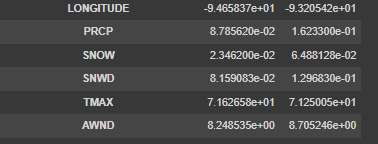

### Continuamos analizando distintas variables para encontrar alguna relacion entre ellas. 

In [30]:
blockmax = flights_seg.groupby(['DEP_TIME_BLK'],sort=True).max()
blockmax

,MONTH,DAY_OF_WEEK,DEP_DEL15,DISTANCE_GROUP,SEGMENT_NUMBER,CONCURRENT_FLIGHTS,NUMBER_OF_SEATS,CARRIER_NAME,AIRPORT_FLIGHTS_MONTH,AIRLINE_FLIGHTS_MONTH,...,PREVIOUS_AIRPORT,PRCP,SNOW,SNWD,TMAX,AWND,CARRIER_HISTORICAL,DEP_AIRPORT_HIST,DAY_HISTORICAL,DEP_BLOCK_HIST
DEP_TIME_BLK,,,,,,,,,,,,,,,,,,,,,
0001-0559,12,7,1,11,7,87,294,United Air Lines Inc.,35256,117728,...,William P Hobby,6.24,8.7,16.1,115.0,29.30,0.350235,0.342455,0.270709,0.100252
0600-0659,12,7,1,11,5,51,304,United Air Lines Inc.,35256,117728,...,William P Hobby,11.63,9.9,18.9,114.0,32.88,0.350235,0.344400,0.270709,0.081939
0700-0759,12,7,1,11,4,79,337,United Air Lines Inc.,35256,117728,...,Yuma MCAS/Yuma International,7.46,8.5,18.1,115.0,33.78,0.350235,0.344400,0.270709,0.110788
0800-0859,12,7,1,11,7,109,337,United Air Lines Inc.,35256,117728,...,Yuma MCAS/Yuma International,10.39,8.5,20.1,115.0,27.07,0.350235,0.352160,0.270709,0.132733
0900-0959,12,7,1,11,6,98,337,United Air Lines Inc.,35256,117728,...,Yuma MCAS/Yuma International,11.63,8.5,22.8,115.0,29.30,0.350235,0.352160,0.270709,0.161689
1000-1059,12,7,1,11,6,93,337,United Air Lines Inc.,35256,117728,...,Yuma MCAS/Yuma International,11.63,8.5,22.8,115.0,27.96,0.350235,0.352160,0.270709,0.187484
1100-1159,12,7,1,11,6,70,294,United Air Lines Inc.,35256,117728,...,Yuma MCAS/Yuma International,11.63,6.8,20.1,115.0,28.19,0.350235,0.352160,0.270709,0.206876
1200-1259,12,7,1,11,7,88,337,United Air Lines Inc.,35256,117728,...,Yuma MCAS/Yuma International,10.39,9.9,18.1,114.0,28.19,0.350235,0.352160,0.270709,0.228410
1300-1359,12,7,1,11,8,78,337,United Air Lines Inc.,35256,117728,...,Yuma MCAS/Yuma International,10.39,8.5,20.9,115.0,28.63,0.350235,0.352160,0.270709,0.246487


In [31]:
blockmin = flights_seg.groupby(['DEP_TIME_BLK'],sort=True).min()
blockmin

,MONTH,DAY_OF_WEEK,DEP_DEL15,DISTANCE_GROUP,SEGMENT_NUMBER,CONCURRENT_FLIGHTS,NUMBER_OF_SEATS,CARRIER_NAME,AIRPORT_FLIGHTS_MONTH,AIRLINE_FLIGHTS_MONTH,...,PREVIOUS_AIRPORT,PRCP,SNOW,SNWD,TMAX,AWND,CARRIER_HISTORICAL,DEP_AIRPORT_HIST,DAY_HISTORICAL,DEP_BLOCK_HIST
DEP_TIME_BLK,,,,,,,,,,,,,,,,,,,,,
0001-0559,1,1,0,1,1,1,44,Alaska Airlines Inc.,1100,6020,...,Atlanta Municipal,0.0,0.0,0.0,-10.0,0.45,0.064408,0.114858,0.10445,0.060327
0600-0659,1,1,0,1,1,1,44,Alaska Airlines Inc.,1100,5582,...,Abilene Regional,0.0,0.0,0.0,-10.0,0.67,0.064408,0.066310,0.10445,0.055562
0700-0759,1,1,0,1,1,1,44,Alaska Airlines Inc.,1100,5582,...,Abilene Regional,0.0,0.0,0.0,0.0,0.00,0.064408,0.063781,0.10445,0.071477
0800-0859,1,1,0,1,1,1,44,Alaska Airlines Inc.,1103,5582,...,Aberdeen Regional,0.0,0.0,0.0,1.0,0.00,0.064408,0.043423,0.10445,0.084255
0900-0959,1,1,0,1,1,1,44,Alaska Airlines Inc.,1103,5582,...,Aberdeen Regional,0.0,0.0,0.0,1.0,0.67,0.064408,0.063781,0.10445,0.102554
1000-1059,1,1,0,1,1,1,44,Alaska Airlines Inc.,1100,5582,...,Aberdeen Regional,0.0,0.0,0.0,-10.0,0.89,0.064408,0.043423,0.10445,0.111353
1100-1159,1,1,0,1,1,1,44,Alaska Airlines Inc.,1103,5582,...,Aberdeen Regional,0.0,0.0,0.0,-10.0,0.00,0.064408,0.063781,0.10445,0.118393
1200-1259,1,1,0,1,1,1,44,Alaska Airlines Inc.,1100,6020,...,Aberdeen Regional,0.0,0.0,0.0,1.0,0.00,0.064408,0.043423,0.10445,0.127692
1300-1359,1,1,0,1,1,1,44,Alaska Airlines Inc.,1100,5582,...,Adams Field,0.0,0.0,0.0,-10.0,0.00,0.064408,0.043423,0.10445,0.136288


In [32]:
flights_seg.value_counts(['SNOW']) # Separamos la columna snow 

SNOW
0.0     195001
0.1        870
0.2        469
0.3        352
1.0        314
         ...  
7.8          2
4.2          2
5.1          2
8.4          1
8.8          1
Length: 73, dtype: int64

## Nos enfocaremos por ahora en la variable SNOW:

Los valores de la columna snow estaban como "Float", se realiza el cambio a "Int64". 
Sabemos que los bajos niveles de nieve, ej: 0.05 no son relativos y no pueden demorar un vuelo, por lo que al convertir los valores de float a int, los valores menores a 0.5 seran 0 y los mayores a 0.5 seran 1. 

In [33]:
flights_seg['SNOW']=flights_seg['SNOW'].astype(np.int64) 

<ipython-input-33-5f8403c6765f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  flights_seg['SNOW']=flights_seg['SNOW'].astype(np.int64)


In [34]:
flights_seg.value_counts(['SNOW']) 

SNOW
0       197863
1         1094
2          429
3          315
4          121
5           66
6           52
8           32
7           22
9            6
dtype: int64

### Para graficar y lograr entender este fenomeno, se define categorizar esta variable en los siguientes grupos. 

* Todos los valores comprendidos en 1 y 3 pasaran a ser 1, seria el valor minimo de nevada. 
* Todos los valores comprendidos en 3 y 6 pasaran a ser 2, seria el valor medio
* Todos los valores comprendidos entreg 6 y 9, pasaran a ser 3, seria el valor mas alto de la nevada. 



In [35]:
snow_var = []

for i in flights_seg['SNOW']:
  if i in range (1,3):
    snow_var.append(1)
  elif i in range (3,6):
    snow_var.append(2)
  elif i in range (6,9):
    snow_var.append(3)
  else:
    snow_var.append(0)  

flights_seg['SNOW'] = snow_var

<ipython-input-35-b455ae89f827>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  flights_seg['SNOW'] = snow_var


## Como podemos ver en el grafico, es determinante la cantidad de nieve sobre el retraso de los vuelos. 

## Ej. En los los meses donde hubo mas nieve, hubo mas vuelos demorados que vuelos que partieron a tiempo. 

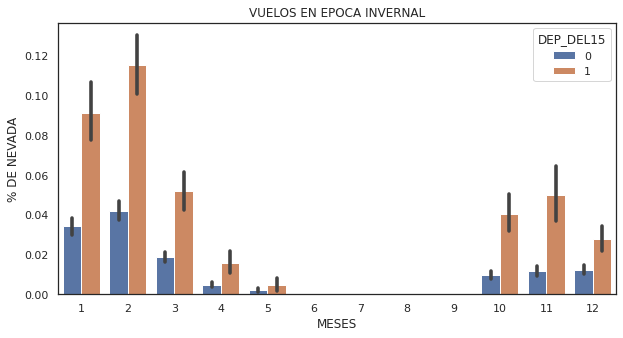

In [36]:
fig = plt.figure(figsize=(10,5))
sns.barplot(data=flights_seg, x='MONTH', y='SNOW', hue='DEP_DEL15')
plt.title('VUELOS EN EPOCA INVERNAL')
plt.xlabel('MESES')
plt.ylabel('% DE NEVADA')
plt.show()

## Dado a que el factor climatico es determinante en estos casos, se realizaran graficas para comprender mejor lo analizado. 

In [37]:
flights_seg['PRCP']=flights_seg['PRCP'].astype(np.int64)
flights_seg['SNWD']=flights_seg['SNWD'].astype(np.int64)
flights_seg['AWND']=flights_seg['AWND'].astype(np.int64)

<ipython-input-37-36e58406c9e7>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  flights_seg['PRCP']=flights_seg['PRCP'].astype(np.int64)
<ipython-input-37-36e58406c9e7>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  flights_seg['SNWD']=flights_seg['SNWD'].astype(np.int64)
<ipython-input-37-36e58406c9e7>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas

In [38]:
flights_seg.value_counts(['PRCP'])

PRCP
0       194949
1         4099
2          690
3          144
4           50
7           41
11          15
10           8
6            3
5            1
dtype: int64

In [39]:
prcp_var = []

for i in flights_seg['PRCP']:
  if i in range (1,3):
    prcp_var.append(1)
  elif i in range (3,6):
    prcp_var.append(2)
  elif i in range (6,12):
    prcp_var.append(3)
  else:
    prcp_var.append(0)  

flights_seg['PRCP'] = prcp_var

<ipython-input-39-815e07e39ad1>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  flights_seg['PRCP'] = prcp_var


In [40]:
flights_seg.value_counts(['PRCP'])

PRCP
0       194949
1         4789
2          195
3           67
dtype: int64

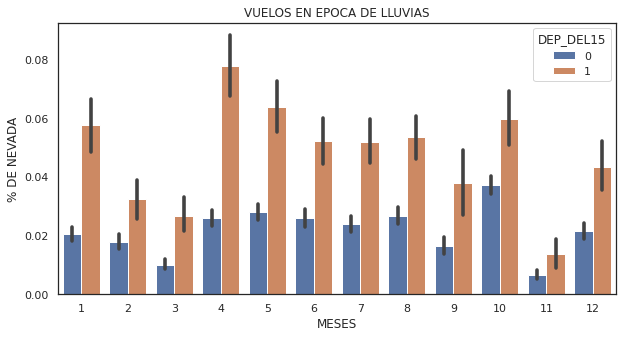

In [51]:
fig = plt.figure(figsize=(10,5))
sns.barplot(data=flights_seg, x='MONTH', y='PRCP', hue='DEP_DEL15')
plt.title('VUELOS EN EPOCA DE LLUVIAS')
plt.xlabel('MESES')
plt.ylabel('% DE NEVADA')
plt.show()

In [42]:
flights_seg.value_counts(['SNWD'])

SNWD
0       194720
1         1696
3         1247
2         1042
5          659
7          322
9          144
11          65
18          24
15          23
16          17
13          12
20          12
14           9
22           4
6            2
25           2
dtype: int64

In [43]:
snwd_var = []

for i in flights_seg['SNWD']:
  if i in range (1,8):
    snwd_var.append(1)
  elif i in range (8,13):
    snwd_var.append(2)
  elif i in range (13,26):
    snwd_var.append(3)
  else:
    snwd_var.append(0)  

flights_seg['SNWD'] = snwd_var

<ipython-input-43-9dde3503875f>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  flights_seg['SNWD'] = snwd_var


In [44]:
flights_seg.value_counts(['SNWD'])

SNWD
0       194720
1         4968
2          209
3          103
dtype: int64

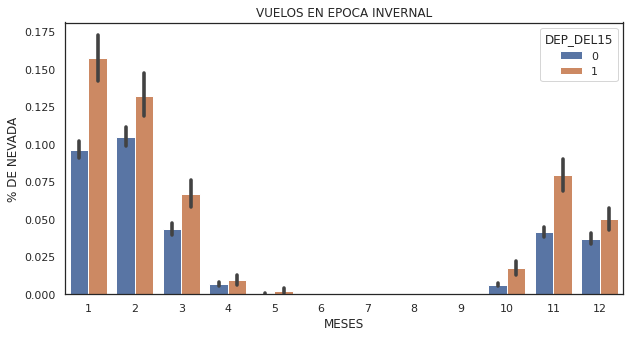

In [45]:
fig = plt.figure(figsize=(10,5))
sns.barplot(data=flights_seg, x='MONTH', y='SNWD', hue='DEP_DEL15')
plt.title('VUELOS EN EPOCA INVERNAL')
plt.xlabel('MESES')
plt.ylabel('% DE NEVADA')
plt.show()

In [46]:
flights_seg.value_counts(['AWND'])

AWND
6       26181
8       24167
7       22587
5       20864
4       19277
10      15993
9       15784
11      10005
3        9537
12       9178
13       5703
2        5042
14       4885
15       2554
16       2354
17       1811
18        926
19        891
1         764
20        576
21        254
22        203
23        118
0         107
25         85
24         69
27         35
26         22
28         20
29          5
32          2
33          1
dtype: int64

In [47]:
awnd_var = []

for i in flights_seg['AWND']:
  if i in range (1,11):
    awnd_var.append(1)
  elif i in range (11,21):
    awnd_var.append(2)
  elif i in range (21,34):
    awnd_var.append(3)
  else:
    awnd_var.append(0)  

flights_seg['AWND'] = awnd_var

<ipython-input-47-e518ad3e2707>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  flights_seg['AWND'] = awnd_var


In [48]:
flights_seg.value_counts(['AWND'])

AWND
1       160196
2        38883
3          814
0          107
dtype: int64

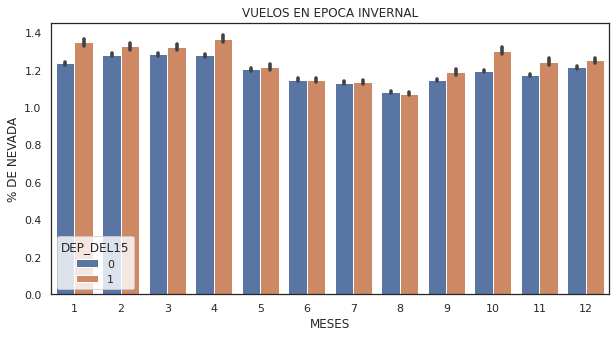

In [49]:
fig = plt.figure(figsize=(10,5))
sns.barplot(data=flights_seg, x='MONTH', y='AWND', hue='DEP_DEL15')
plt.title('VUELOS EN EPOCA INVERNAL')
plt.xlabel('MESES')
plt.ylabel('% DE NEVADA')
plt.show()

Con el siguiente grafico podemos ver la cantidad de vuelos por mes. 
Esto nos sirve para entender el trafico aereo por temporadas. 

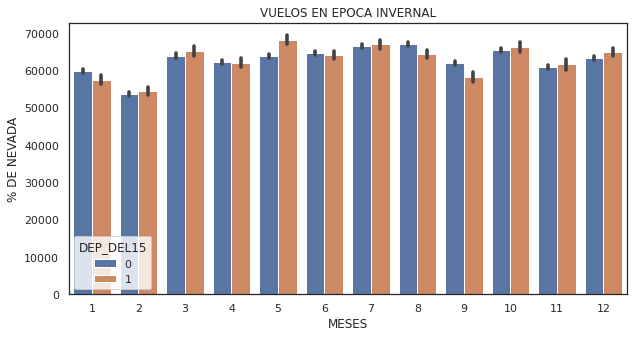

In [50]:
fig = plt.figure(figsize=(10,5))
sns.barplot(data=flights_seg, x='MONTH', y='AIRLINE_FLIGHTS_MONTH', hue='DEP_DEL15')
plt.title('VUELOS EN EPOCA INVERNAL')
plt.xlabel('MESES')
plt.ylabel('% DE NEVADA')
plt.show()



# ¿Hay relacion entre el clima y las demoras?

Segun nuestro analisis sobre las codiciones climaticas, se llega a la conclusion de que hay condiciones climaticas aisladas que pueden demorar un vuelo, por ejemplo la nieve, en las demas condiciones climaticas, viento, lluvia, etc. las demoras se producen cuando estas condiciones coinciden en el dia. 


#2. FEATURE SELECTION #
## Seleccion de variables para entrenar nuestro modelo 

### 2.1 Analizamos las correlaciones entre variables. 

In [ ]:
# Leemos el dataset ubicado en una carpeta en google drive. 
flights = pd.read_csv('/content/drive/MyDrive/Natanael Cobos - DataScience/Cobos Natanael - Segunda pre entrega/train.csv')

In [ ]:
flights_seg=flights[0:200000]
flights_seg.memory_usage().sum()

48000128

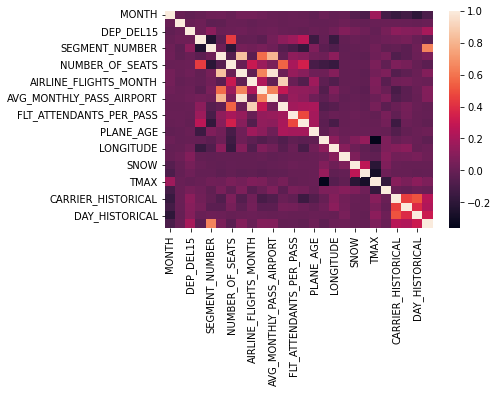

In [ ]:
sns.heatmap(flights_seg.corr())